# Ensemble learning :
    


“Unity is strength”. This old saying expresses pretty well the underlying idea that rules the very powerful “ensemble methods” in machine learning. Roughly, ensemble learning methods, that often trust the top rankings of many machine learning competitions (including Kaggle’s competitions), are based on the hypothesis that combining multiple models together can often produce a much more powerful model.

Ensemble learning is a machine learning paradigm where multiple models (often called “weak learners”) are trained to solve the same problem and combined to get better results. The main hypothesis is that when weak models are correctly combined we can obtain more accurate and/or robust models.

In ensemble learning theory, we call weak learners (or base models) models that can be used as building blocks for designing more complex models by combining several of them. Most of the time, these basics models perform not so well by themselves either because they have a high bias (low degree of freedom models, for example) or because they have too much variance to be robust (high degree of freedom models, for example). Then, the idea of ensemble methods is to try reducing bias and/or variance of such weak learners by combining several of them together in order to create a strong learner (or ensemble model) that achieves better performances.

## Simple Ensemble Techniques
In this section, we will look at a few simple but powerful techniques, namely:

- Max Voting
- Averaging
- Weighted Averaging

### Max Voting

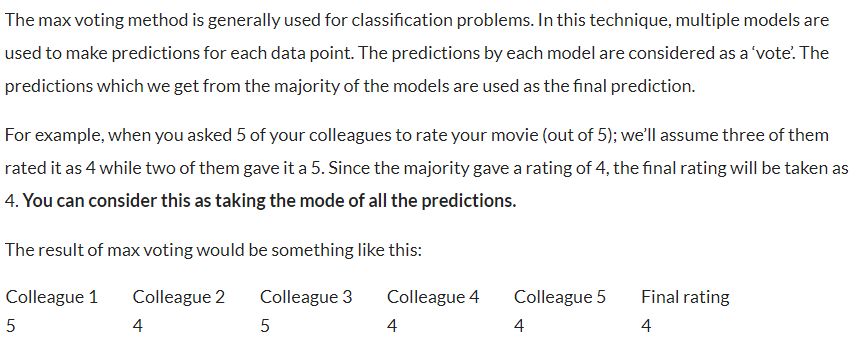

In [37]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statistics as st
import warnings
warnings.filterwarnings('ignore')

# SPLITTING THE DATASET
df = pd.read_csv(r'C:\Users\msohail.afzal\Desktop\heart.csv')
x = df.drop('target', axis = 1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# MODELS CREATION
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

# PREDICTION
pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)

# FINAL_PREDICTION
final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, st.mode([pred1[i], pred2[i], pred3[i]]))
print(final_pred)

[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.]


Alternatively, you can use “VotingClassifier” module in sklearn as follows:

In [43]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9658536585365853

### Averaging

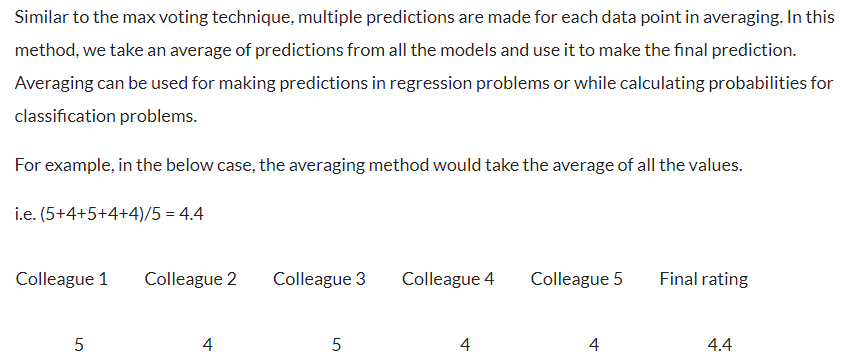

In [9]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict_proba(x_test)   #predict_proba function predicts probability score for Yes adnd No
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)

finalpred=(pred1+pred2+pred3)/3

finalpred

array([[0.03089197, 0.96910803],
       [0.76273448, 0.23726552],
       [0.99795611, 0.00204389],
       [0.0319206 , 0.9680794 ],
       [0.99458204, 0.00541796],
       [0.79375568, 0.20624432],
       [0.7973943 , 0.2026057 ],
       [0.79617338, 0.20382662],
       [0.98543597, 0.01456403],
       [0.76594646, 0.23405354],
       [0.71397065, 0.28602935],
       [0.86631611, 0.13368389],
       [0.31936209, 0.68063791],
       [0.80673394, 0.19326606],
       [0.0314644 , 0.9685356 ],
       [0.00708789, 0.99291211],
       [0.01087841, 0.98912159],
       [0.99756421, 0.00243579],
       [0.0035312 , 0.9964688 ],
       [0.89639758, 0.10360242],
       [0.02567201, 0.97432799],
       [0.31331618, 0.68668382],
       [0.10372812, 0.89627188],
       [0.31331618, 0.68668382],
       [0.00708789, 0.99291211],
       [0.01486195, 0.98513805],
       [0.00891041, 0.99108959],
       [0.62558357, 0.37441643],
       [0.27116444, 0.72883556],
       [0.06973298, 0.93026702],
       [0.

### Weighted Average

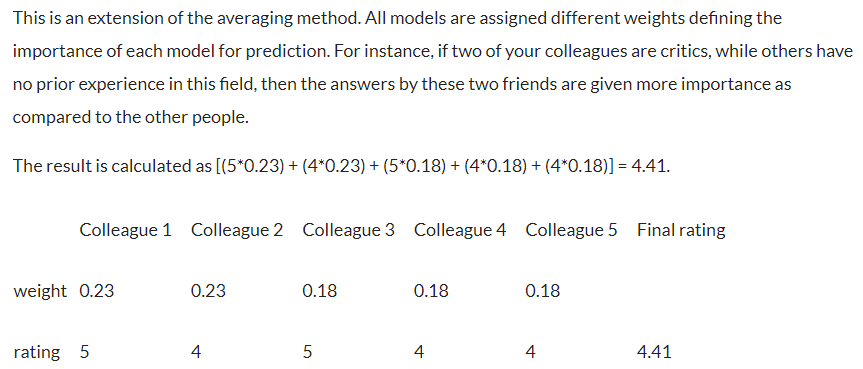

In [11]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict_proba(x_test)
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)

finalpred=(pred1*0.3+pred2*0.3+pred3*0.4)
finalpred

array([[0.03707037, 0.96292963],
       [0.71528137, 0.28471863],
       [0.99754733, 0.00245267],
       [0.03830472, 0.96169528],
       [0.99349845, 0.00650155],
       [0.81250682, 0.18749318],
       [0.79687316, 0.20312684],
       [0.81540805, 0.18459195],
       [0.98252316, 0.01747684],
       [0.71913575, 0.28086425],
       [0.69676478, 0.30323522],
       [0.87957934, 0.12042066],
       [0.3232345 , 0.6767655 ],
       [0.76808073, 0.23191927],
       [0.03775728, 0.96224272],
       [0.00850546, 0.99149454],
       [0.01305409, 0.98694591],
       [0.99707706, 0.00292294],
       [0.00423745, 0.99576255],
       [0.87567709, 0.12432291],
       [0.03080641, 0.96919359],
       [0.29597942, 0.70402058],
       [0.12447374, 0.87552626],
       [0.29597942, 0.70402058],
       [0.00850546, 0.99149454],
       [0.01783434, 0.98216566],
       [0.01069249, 0.98930751],
       [0.59070029, 0.40929971],
       [0.24539733, 0.75460267],
       [0.06367958, 0.93632042],
       [0.

## Advanced Ensemble techniques

- Bagging
- Boosting
- Stacking
- Blending

## Bagging

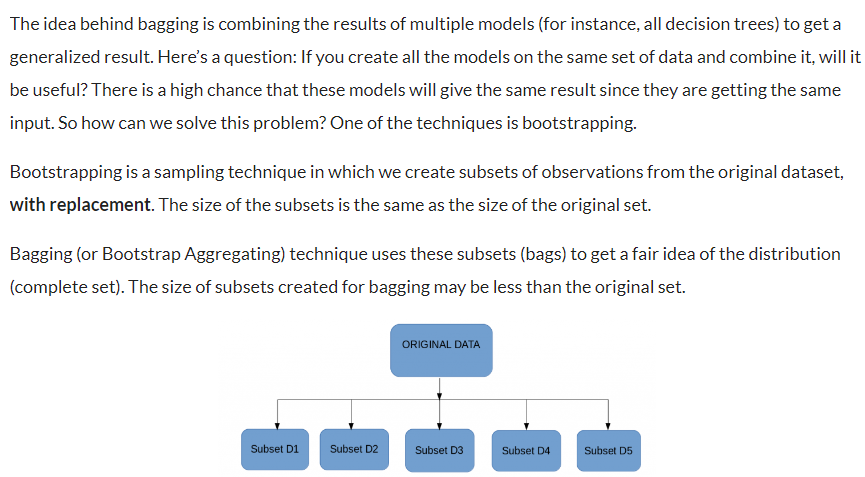

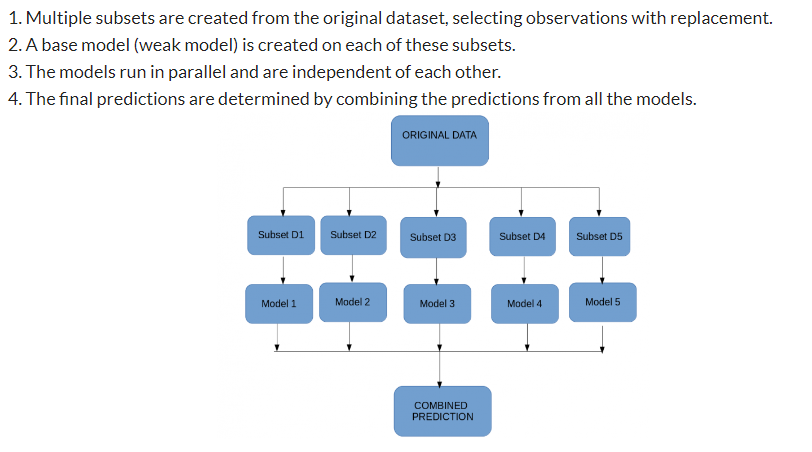

In [27]:
import pandas as pd
import numpy as np


In [24]:
train_data = pd.read_csv(r'C:\Users\msohail.afzal\Desktop\train_survive.csv')
test_data = pd.read_csv(r'C:\Users\msohail.afzal\Desktop\test_survive.csv')

# view the top 3 rows of the dataset
print(train_data.head(3))

# shape of the dataset
print('\nShape of training data :',train_data.shape)
print('\nShape of testing data :',test_data.shape)

# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Survived'],axis=1)
train_y = train_data['Survived']

# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Survived'],axis=1)
test_y = test_data['Survived']

   Survived        Age     Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  \
0         0  28.500000   7.2292         0         0         1           0   
1         1  27.000000  10.5000         0         1         0           1   
2         1  29.699118  16.1000         0         0         1           1   

   Sex_male  SibSp_0  SibSp_1  ...  Parch_0  Parch_1  Parch_2  Parch_3  \
0         1        1        0  ...        1        0        0        0   
1         0        1        0  ...        1        0        0        0   
2         0        0        1  ...        1        0        0        0   

   Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  
0        0        0        0           1           0           0  
1        0        0        0           0           0           1  
2        0        0        0           0           0           1  

[3 rows x 25 columns]

Shape of training data : (712, 25)

Shape of testing data : (179, 25)


## Bagging algorithms:

- Bagging meta-estimator
- Random forest

### 1) Bagging meta-estimator


In [25]:
#sample code or classification problem
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(DecisionTreeClassifier(random_state=1))
model.fit(train_x, train_y)
model.score(test_x,test_y)

0.8324022346368715

In [26]:
#sample code or regression problem
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(train_x, train_y)
model.score(test_x,test_y)

0.38142902918452903

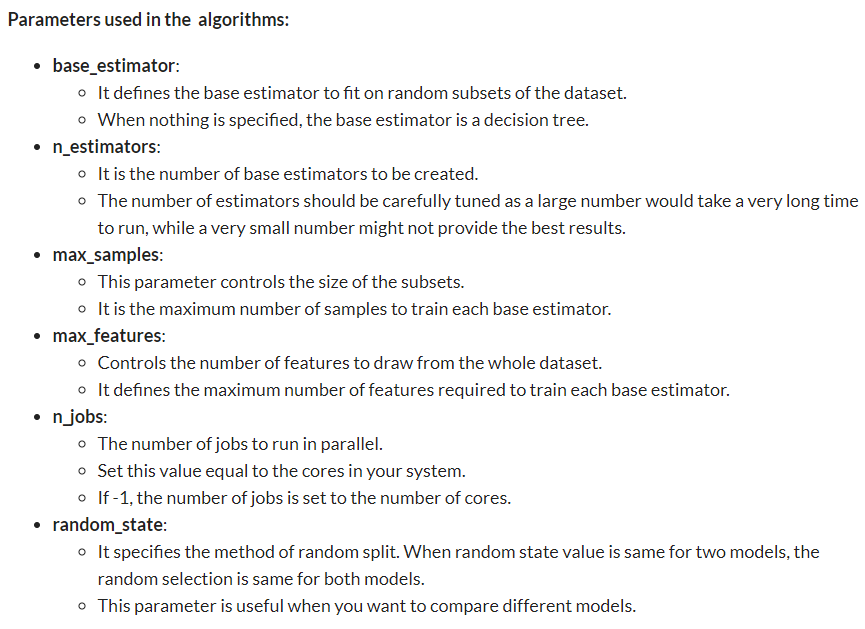

### 2) Random Forest

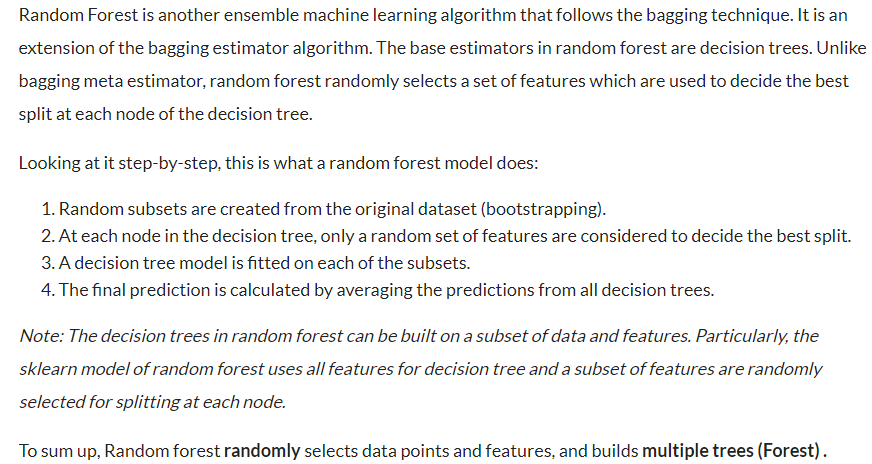

In [28]:
# importing required libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# read the train and test dataset
train_data = pd.read_csv(r'C:\Users\msohail.afzal\Desktop\train_survive.csv')
test_data = pd.read_csv(r'C:\Users\msohail.afzal\Desktop\test_survive.csv')

# view the top 3 rows of the dataset
print(train_data.head(3))

# shape of the dataset
print('\nShape of training data :',train_data.shape)
print('\nShape of testing data :',test_data.shape)

# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Survived'],axis=1)
train_y = train_data['Survived']

# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Survived'],axis=1)
test_y = test_data['Survived']



   Survived        Age     Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  \
0         0  28.500000   7.2292         0         0         1           0   
1         1  27.000000  10.5000         0         1         0           1   
2         1  29.699118  16.1000         0         0         1           1   

   Sex_male  SibSp_0  SibSp_1  ...  Parch_0  Parch_1  Parch_2  Parch_3  \
0         1        1        0  ...        1        0        0        0   
1         0        1        0  ...        1        0        0        0   
2         0        0        1  ...        1        0        0        0   

   Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  
0        0        0        0           1           0           0  
1        0        0        0           0           0           1  
2        0        0        0           0           0           1  

[3 rows x 25 columns]

Shape of training data : (712, 25)

Shape of testing data : (179, 25)


In [29]:
'''

Create the object of the Random Forest model
You can also add other parameters and test your code here
Some parameters are : n_estimators and max_depth
Documentation of sklearn RandomForestClassifier: 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

'''
model = RandomForestClassifier()

# fit the model with the training data
model.fit(train_x,train_y)

# number of trees used
print('Number of Trees used : ', model.n_estimators)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(test_x)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


Number of Trees used :  100

Target on train data [0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0
 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0

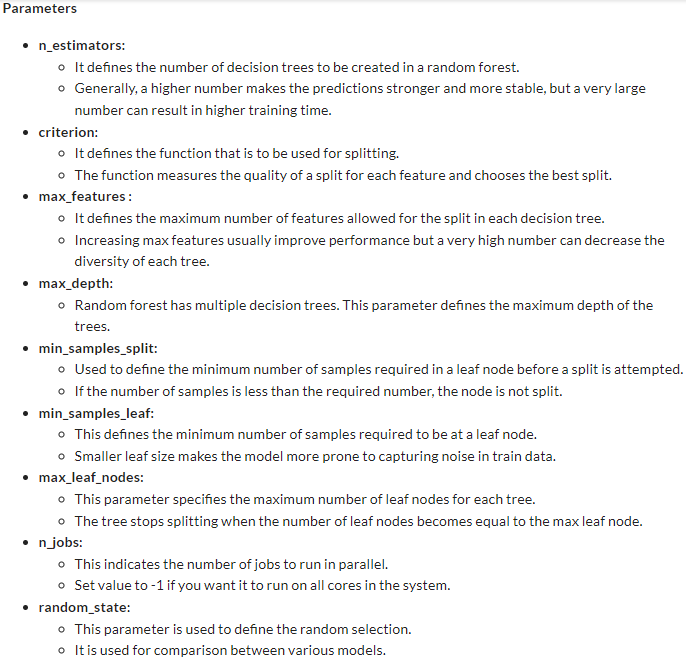

## Boosting

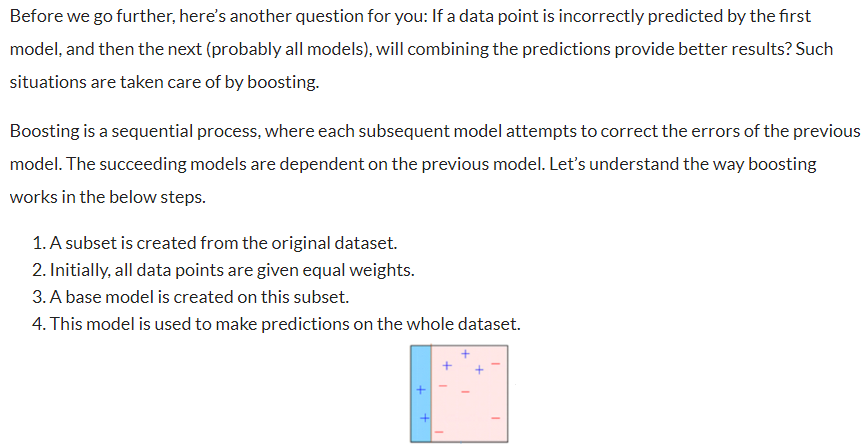

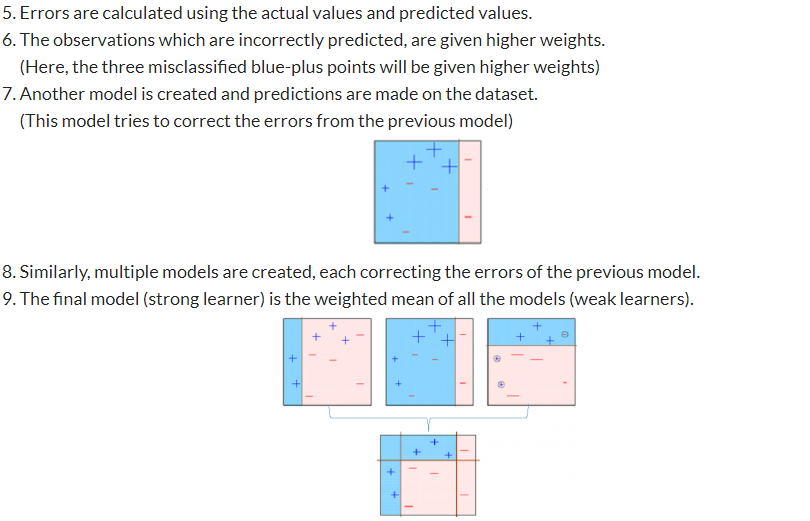

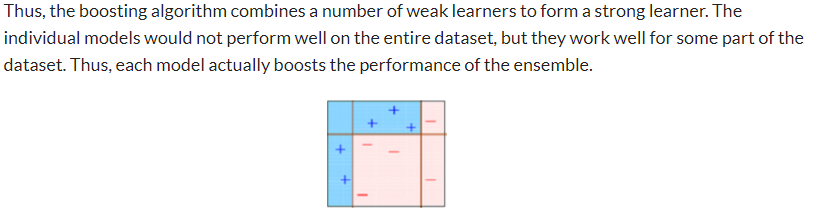

## Boosting Algorithms
- AdaBoost
- GBM
- XGB
- Light GBM
- CatBoost

### 1) Adaboost

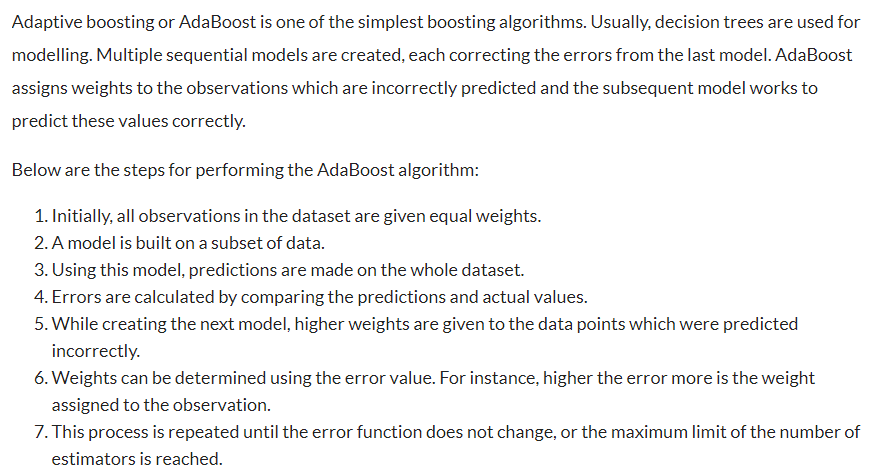

In [31]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(train_x, train_y)
model.score(test_x,test_y)

0.8268156424581006

In [30]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(train_x, train_y)
model.score(test_x,test_y)

0.4372301160360812

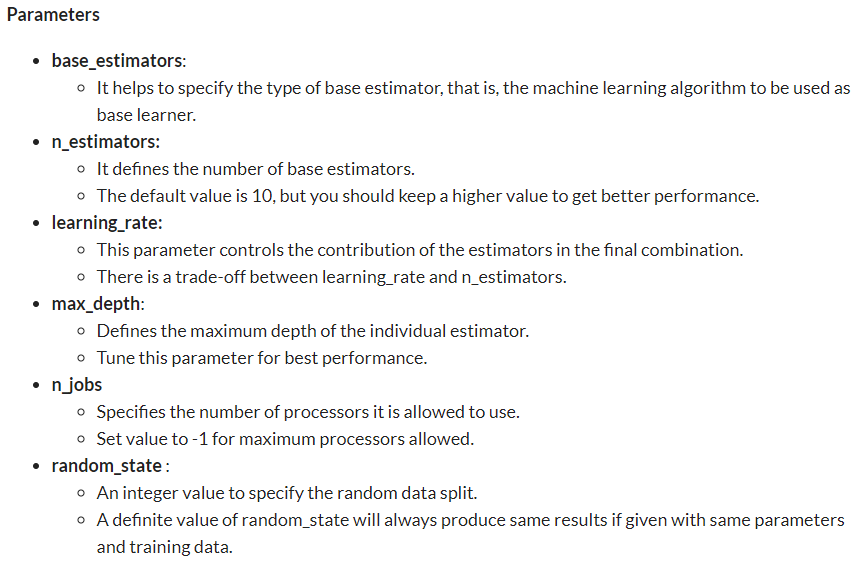

### 2) Gradient Boosting (GBM)

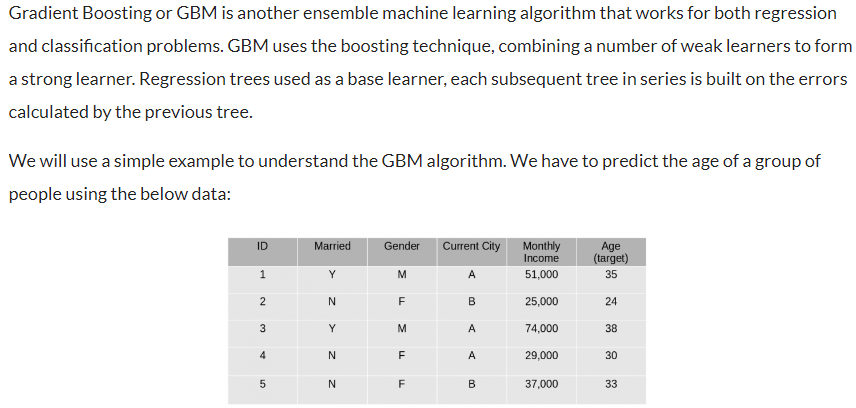

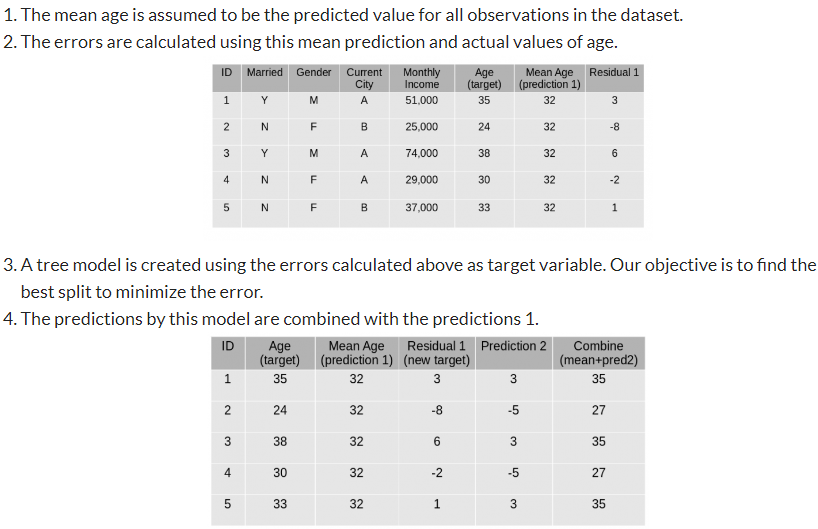

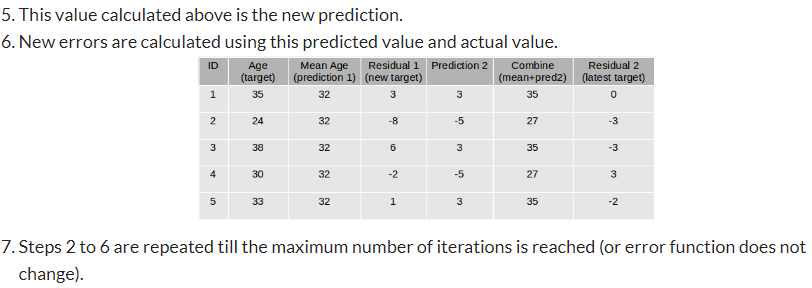

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(train_x, train_y)
model.score(test_x,test_y)

0.8268156424581006

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(train_x, train_y)
model.score(test_x,test_y)

0.489043348061007

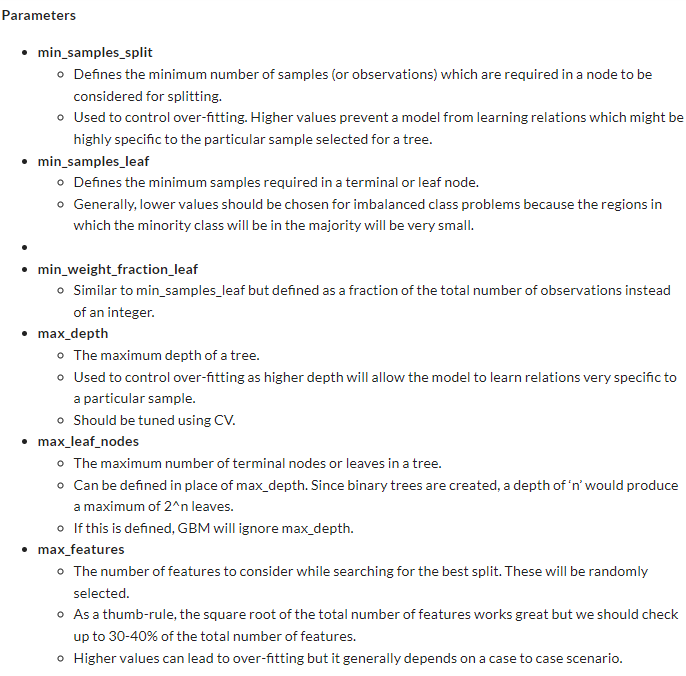

### 3) XGBoost

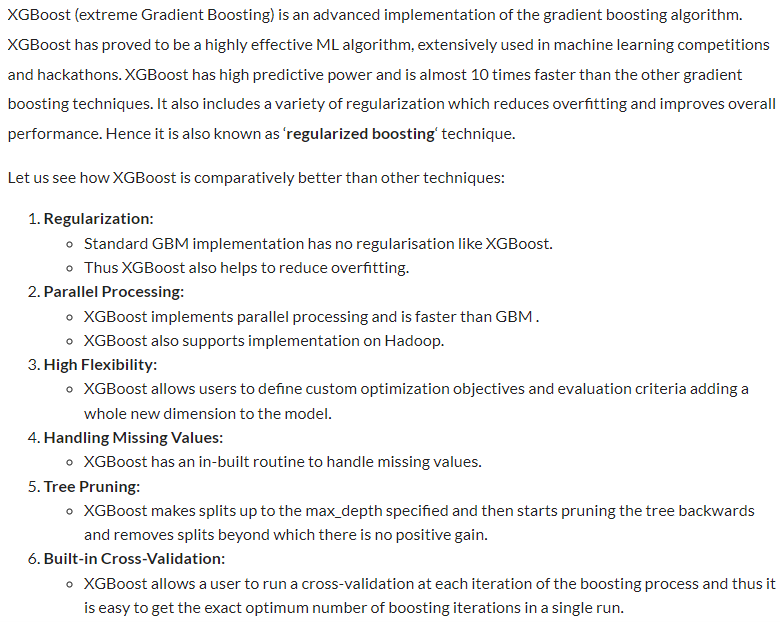

In [34]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(train_x, train_y)
model.score(test_x,test_y)

ModuleNotFoundError: No module named 'xgboost'

In [35]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(train_x, train_y)
model.score(test_x,test_y)

ModuleNotFoundError: No module named 'xgboost'

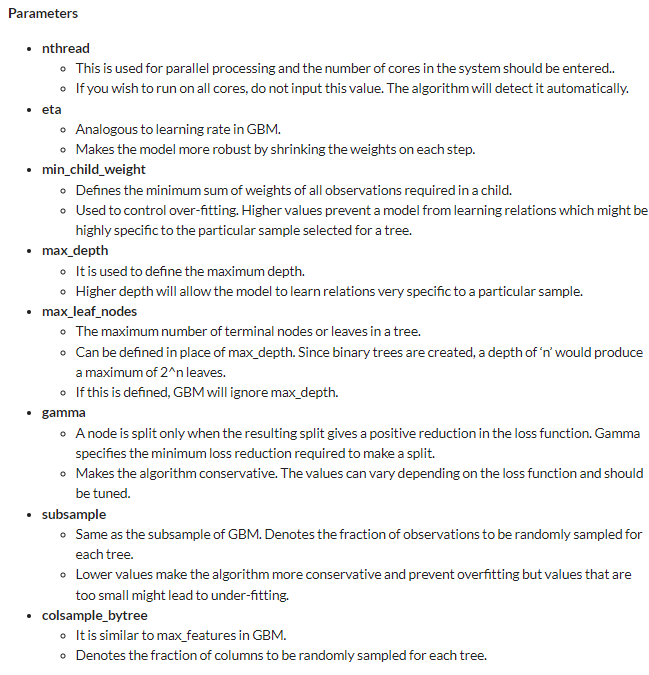

### 4) LightGBM

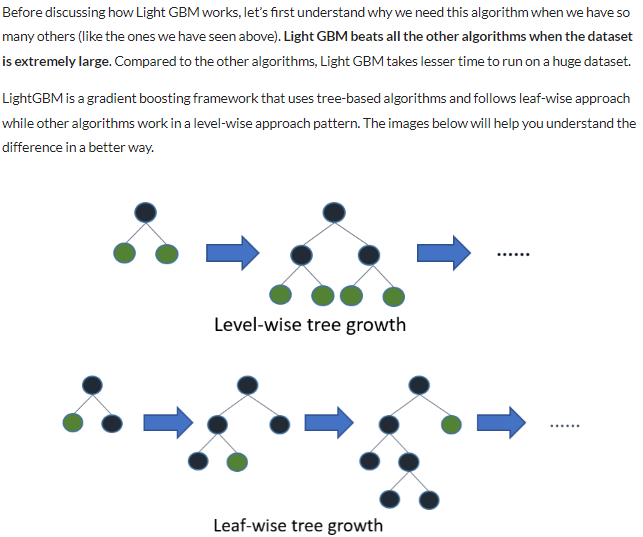


### 5) CatBoost
Handling categorical variables is a tedious process, especially when you have a large number of such variables. When your categorical variables have too many labels (i.e. they are highly cardinal), performing one-hot-encoding on them exponentially increases the dimensionality and it becomes really difficult to work with the dataset.

CatBoost can automatically deal with categorical variables and does not require extensive data preprocessing like other machine learning algorithms.

STACKING and BLENDING techniques of ensemble learning will be covered in next lab..

<b>TASKS :</b>

Download any classification dataset and apply following algorithms :

    a) Apply Gaussian Naive Bayes

    b) Apply maximum voting by applying three algorithms i-e decision tree, KNN and Logistic regression 

    c) Apply random forest
    
    d) Apply Adaboost with base learner as logistic regression

Plot accuracy of all approaches in a graph.

